In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
df= pd.read_csv('dataset_train+test2 copy.csv', sep=",")

In [3]:
df.head()

,date,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,hour,absH,weekend,out_of_turn
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,1,2,4,17:51:00,17,0.0,1.0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,1,2,4,17:51:59,17,0.0,1.0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,1,2,4,17:53:00,17,0.0,1.0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,1,2,4,17:54:00,17,0.0,1.0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,1,2,4,17:55:00,17,0.0,1.0


In [4]:
df = df[['Temperature', 'Light', 'CO2', 'Occupancy', 'day' , 'absH', 'weekend' , 'out_of_turn', ]]

In [5]:
df.head()

,Temperature,Light,CO2,Occupancy,day,absH,weekend,out_of_turn
0,23.18,426.0,721.25,1,4,17,0.0,1.0
1,23.15,429.5,714.00,1,4,17,0.0,1.0
2,23.15,426.0,713.50,1,4,17,0.0,1.0
3,23.15,426.0,708.25,1,4,17,0.0,1.0
4,23.10,426.0,704.50,1,4,17,0.0,1.0


In [6]:
class_name = 'Occupancy'
df.head()

,Temperature,Light,CO2,Occupancy,day,absH,weekend,out_of_turn
0,23.18,426.0,721.25,1,4,17,0.0,1.0
1,23.15,429.5,714.00,1,4,17,0.0,1.0
2,23.15,426.0,713.50,1,4,17,0.0,1.0
3,23.15,426.0,708.25,1,4,17,0.0,1.0
4,23.10,426.0,704.50,1,4,17,0.0,1.0


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report

In [8]:
selected_columns = ['CO2']

attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [9]:
X.shape

(17895, 1)

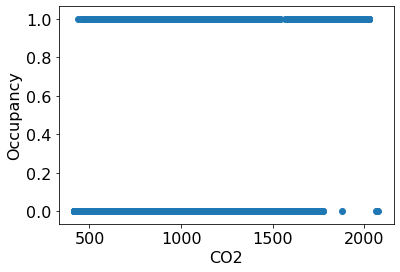

In [10]:
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7740733842428758
F1-score [0.86648321 0.2661827 ]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      4235
           1       0.42      0.19      0.27      1134

    accuracy                           0.77      5369
   macro avg       0.62      0.56      0.57      5369
weighted avg       0.73      0.77      0.74      5369



In [14]:
from scipy.special import expit

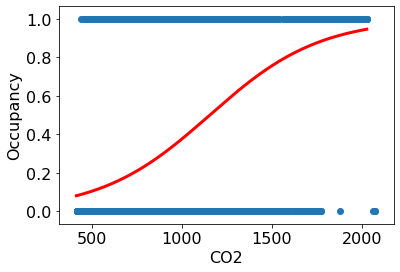

In [15]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [17]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

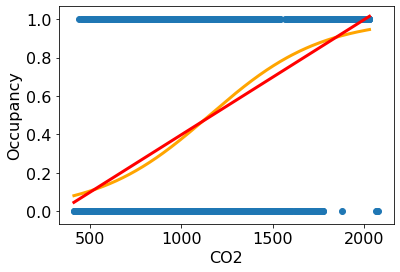

In [19]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()